In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
%matplotlib inline

In [2]:
transactions = []

with open(r'./data/Epub.csv') as file:
    for line in file:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
        
transactions[:3]

[['"doc_154"'], ['"doc_3d6"'], ['"doc_16f"']]

In [3]:
rules = list(apriori(transactions, min_support=0.001, min_confidence=0.10, min_length=2, max_length=2))

In [4]:
print(rules[0])

RelationRecord(items=frozenset({'"doc_11d"', '"doc_6bf"'}), support=0.001589420815054994, ordered_statistics=[OrderedStatistic(items_base=frozenset({'"doc_6bf"'}), items_add=frozenset({'"doc_11d"'}), confidence=0.12195121951219513, lift=5.388120032885722)])


In [5]:
rules_df = pd.DataFrame(
    [{"From": list(rule[0])[0],
      "To": list(rule[0])[1], 
      "Support": rule[1], 
      "Confidence": rule[2][0][2], 
      "Lift": rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head()

,From,To,Support,Confidence,Lift
0,"""doc_11d""","""doc_6bf""",0.001589,0.121951,5.388120
1,"""doc_4ac""","""doc_16e""",0.002797,0.346457,53.425660
2,"""doc_466""","""doc_19f""",0.001526,0.173913,25.806399
3,"""doc_3ec""","""doc_1a2""",0.001017,0.115942,13.311330
4,"""doc_4c7""","""doc_1a2""",0.002098,0.239130,17.996568


In [6]:
rules_df = rules_df.sort_values("Support", ascending=False).head(50)

items = set(rules_df["From"]) | set(rules_df["To"])

imap = {item : i for i, item in enumerate(items)}

rules_df["FromN"] = rules_df["From"].map(imap)
rules_df["ToN"] = rules_df["To"].map(imap)

rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
53,"""doc_813""","""doc_72f""",0.004069,0.351648,16.811784,48,26
1,"""doc_4ac""","""doc_16e""",0.002797,0.346457,53.425660,30,8
14,"""doc_71""","""doc_364""",0.002734,0.233696,15.912549,12,49
46,"""doc_6bf""","""doc_60e""",0.002670,0.274510,21.062267,35,55
60,"""doc_8f9""","""doc_972""",0.002162,0.177083,18.693582,0,52
4,"""doc_4c7""","""doc_1a2""",0.002098,0.239130,17.996568,56,42
8,"""doc_424""","""doc_359""",0.001844,0.271028,44.406250,4,38
37,"""doc_84b""","""doc_4da""",0.001780,0.231405,34.016529,44,7
12,"""doc_43d""","""doc_364""",0.001780,0.152174,16.064050,20,49
58,"""doc_8a8""","""doc_8af""",0.001717,0.290323,47.077153,6,19


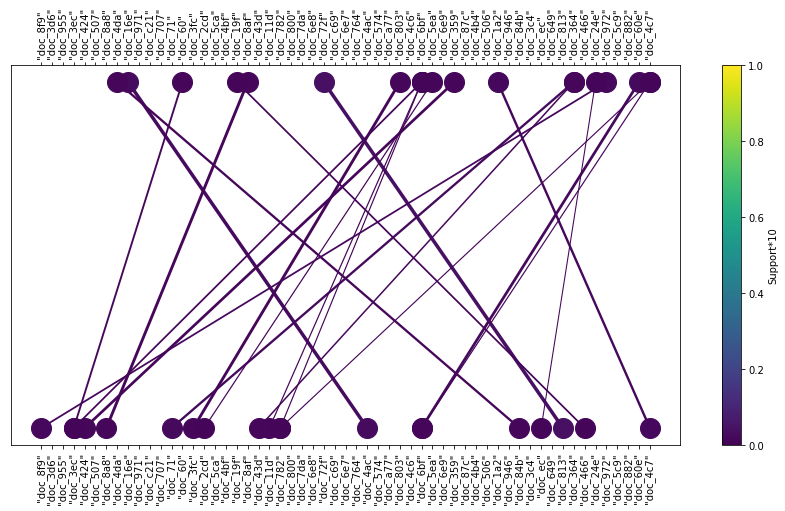

In [7]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig = plt.figure(figsize=(15, 7))

for index, row in rules_df.head(20).iterrows():
    plt.plot([row["FromN"], row["ToN"]], [0,1], 'o-',
             c=plt.cm.viridis(row["Support"] * 10), 
             markersize=20,
             lw=row["Confidence"] * 10)
    
cmap = plt.cm.ScalarMappable(cmap = plt.get_cmap('viridis'))
cmap.set_array([])

cb = plt.colorbar(cmap)
cb.set_label('Support*10')

plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()
